In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

# load dataset

In [136]:
(train_img,train_labels),(test_img,test_labels)=datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [137]:
train_img,test_img=train_img/255.0,test_img/255.0

In [138]:
len(train_img)

60000

In [139]:
len(test_img)

10000

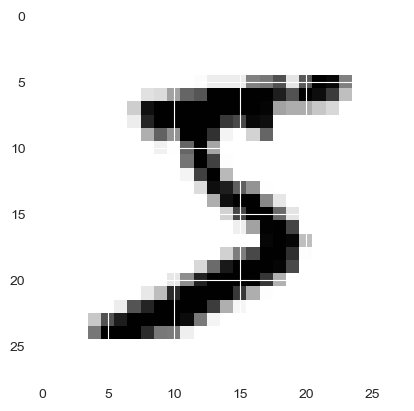

In [140]:
plt.imshow(train_img[0],cmap=plt.cm.gray_r,interpolation='nearest')

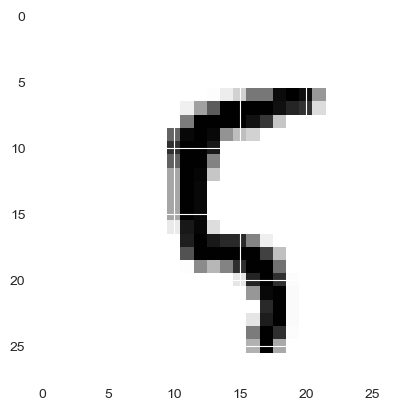

In [141]:
plt.imshow(train_img[100],cmap=plt.cm.gray_r,interpolation='nearest')

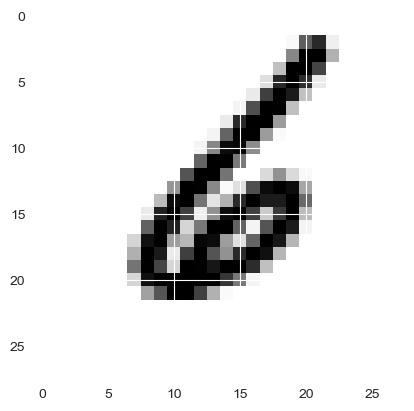

In [142]:
plt.imshow(train_img[999],cmap=plt.cm.gray_r,interpolation='nearest')

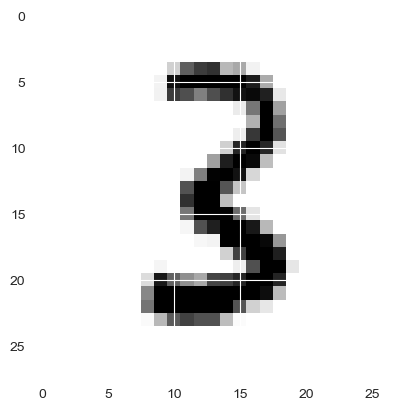

In [143]:
plt.imshow(train_img[50000],cmap=plt.cm.gray_r,interpolation='nearest')

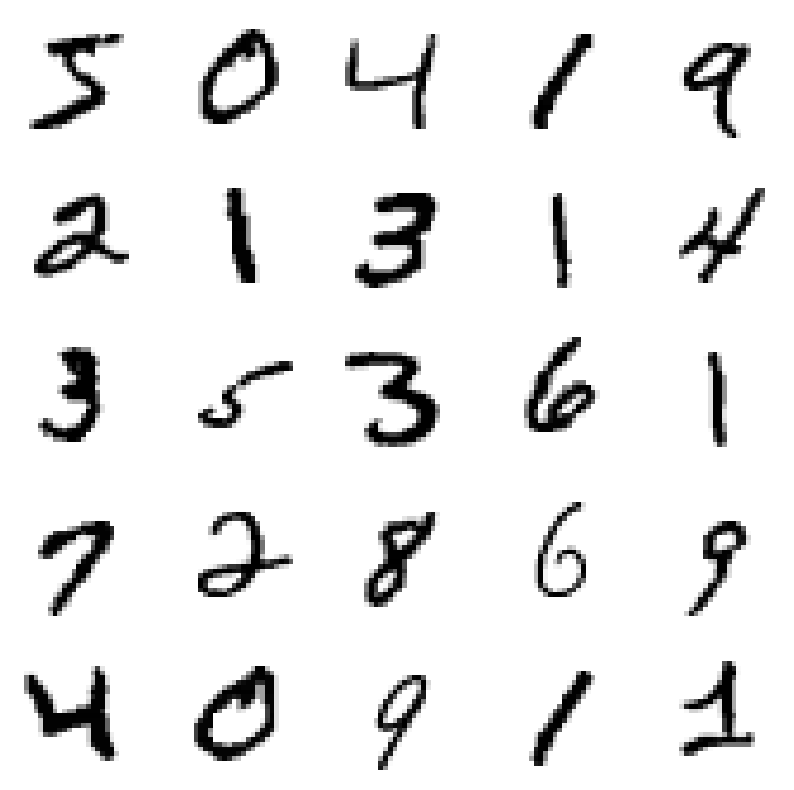

In [145]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i],cmap=plt.cm.binary)
plt.show()    

In [148]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    
    tf.keras.layers.Dense(128,activation='relu'),
    
    tf.keras.layers.Dense(10)
])

In [150]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],



)

In [151]:
model.fit(
    train_img,train_labels,
    epochs=10,
    validation_data=(test_img,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 23s 7ms/step - loss: 0.2586 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.1308 - val_sparse_categorical_accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.1007 - val_sparse_categorical_accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.0744 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.0789 - val_sparse_categorical_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - spar

In [152]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
model.add(layers.Flatten())


In [154]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [155]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [156]:
model.fit(train_img,train_labels,epochs=12,
         validation_data=(test_img,test_labels))

Epoch 1/12
1875/1875 [==============================] - 17s 6ms/step - loss: 0.0812 - accuracy: 0.9763 - val_loss: 0.0849 - val_accuracy: 0.9761
Epoch 2/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.1013 - val_accuracy: 0.9740
Epoch 3/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.1112 - val_accuracy: 0.9756
Epoch 4/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.1124 - val_accuracy: 0.9770
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.1450 - val_accuracy: 0.9688
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.1137 - val_accuracy: 0.9770
Epoch 7/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.1348 - val_accuracy

In [157]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
 flatten_4 (Flatten)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                704       
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 103124 (402.83 KB)
Trainable params: 103

In [158]:
model_json=model.to_json()
with open("model.json","w")as json_file:
    json_file.write(model_json)

In [159]:
model.save_weights("model.h5")
print("saved model to disk")

saved model to disk


In [160]:
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

In [162]:
model.load_weights("model.h5")
print("loaded model from disk")

loaded model from disk
